In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, precision_recall_fscore_support
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('lab4_5.csv')
df.head()

,X1,X2,Class
0,-1.115138,0.738108,DOWN
1,-1.836181,1.041943,DOWN
2,-0.771741,0.248164,DOWN
3,-2.500027,1.273076,DOWN
4,-0.291992,0.117160,DOWN


In [3]:
le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])
df.head()

,X1,X2,Class
0,-1.115138,0.738108,0
1,-1.836181,1.041943,0
2,-0.771741,0.248164,0
3,-2.500027,1.273076,0
4,-0.291992,0.117160,0


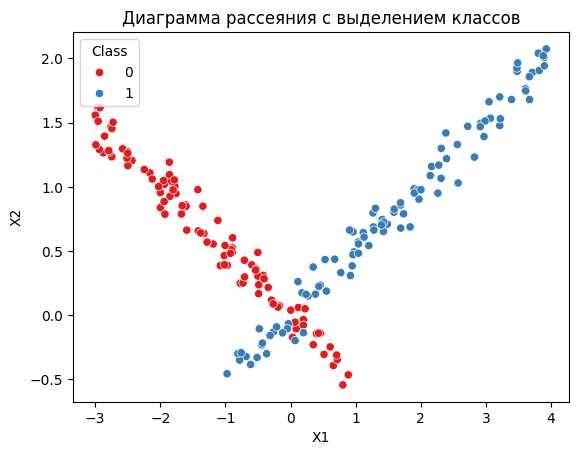

In [4]:
scatter_plot = sns.scatterplot(data=df, x='X1', y='X2', hue='Class', palette='Set1')
scatter_plot.set_title('Диаграмма рассеяния с выделением классов')
plt.show()

In [5]:
class_counts = df['Class'].value_counts()
class_counts

Class
0    100
1    100
Name: count, dtype: int64

In [6]:
X = df.drop(["Class"], axis = 1)
y = df["Class"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state= 42)

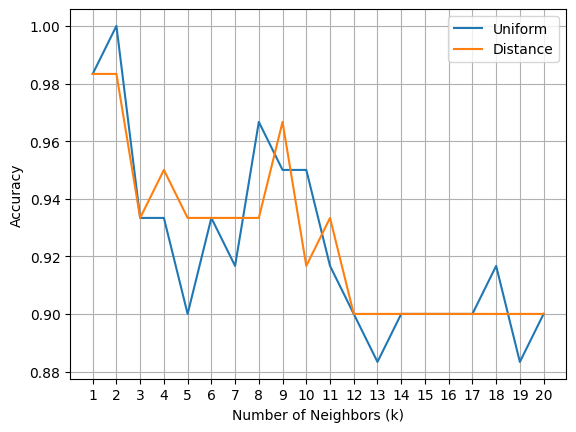

In [7]:
# Списки для хранения точности
k_values = range(1, 21)
accuracies_uniform = []
accuracies_distance = []

# Проведение классификации для различных значений k
for k in k_values:
    # Невзвешенный метод
    knn_uniform = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    knn_uniform.fit(X_train, y_train)
    y_pred_uniform = knn_uniform.predict(X_test)
    accuracy_uniform = accuracy_score(y_test, y_pred_uniform)
    accuracies_uniform.append(accuracy_uniform)

    # Взвешенный метод
    knn_distance = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn_distance.fit(X_train, y_train)
    y_pred_distance = knn_distance.predict(X_test)
    accuracy_distance = accuracy_score(y_test, y_pred_distance)
    accuracies_distance.append(accuracy_distance)

# Построение графиков
plt.plot(k_values, accuracies_uniform, label='Uniform')
plt.plot(k_values, accuracies_distance, label='Distance')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)  # Установка меток на оси x
plt.legend()
plt.grid()
plt.show()

In [8]:
# Функция для вычисления метрик и построения таблицы ошибок
def metrics(y_test, y_pred):
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    cm = confusion_matrix(y_test, y_pred)
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(cm)

knn_uniform = KNeighborsClassifier(n_neighbors=2, weights='uniform')
knn_uniform.fit(X_train, y_train)
y_pred_uniform = knn_uniform.predict(X_test)
metrics(y_test, y_pred_uniform)

Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Confusion Matrix:
[[31  0]
 [ 0 29]]


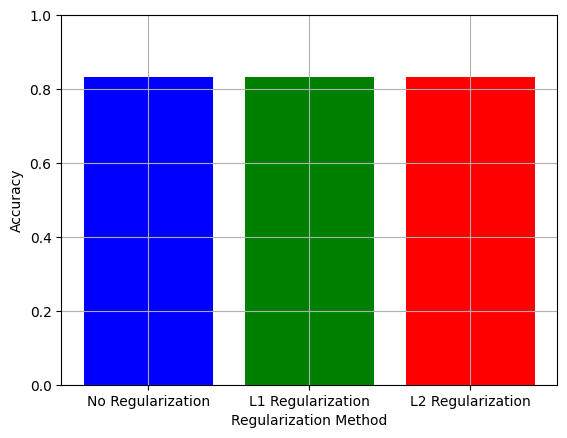

In [9]:
# Без регуляризации (penalty='none')
log_reg_none = LogisticRegression(penalty= None, solver='saga', max_iter=1000)
log_reg_none.fit(X_train, y_train)
y_pred_none = log_reg_none.predict(X_test)
accuracy_none = accuracy_score(y_test, y_pred_none)

# С L1 регуляризацией (penalty='l1')
log_reg_l1 = LogisticRegression(penalty='l1', solver='saga', max_iter=1000)
log_reg_l1.fit(X_train, y_train)
y_pred_l1 = log_reg_l1.predict(X_test)
accuracy_l1 = accuracy_score(y_test, y_pred_l1)

# С L2 регуляризацией (penalty='l2')
log_reg_l2 = LogisticRegression(penalty='l2', solver='saga', max_iter=1000)
log_reg_l2.fit(X_train, y_train)
y_pred_l2 = log_reg_l2.predict(X_test)
accuracy_l2 = accuracy_score(y_test, y_pred_l2)

# Подготовка данных для диаграммы
methods = ['No Regularization', 'L1 Regularization', 'L2 Regularization']
accuracies = [accuracy_none, accuracy_l1, accuracy_l2]

# Построение столбчатой диаграммы
plt.bar(methods, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Regularization Method')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Устанавливаем диапазон значений по оси y от 0 до 1
plt.grid()
plt.show()

In [10]:
log_reg_none = LogisticRegression(penalty= None, solver='saga', max_iter=1000)
log_reg_none.fit(X_train, y_train)
y_pred_none = log_reg_none.predict(X_test)
metrics(y_test, y_pred_none)

Precision: 0.8384
Recall: 0.8354
F1 Score: 0.8331
Confusion Matrix:
[[24  7]
 [ 3 26]]


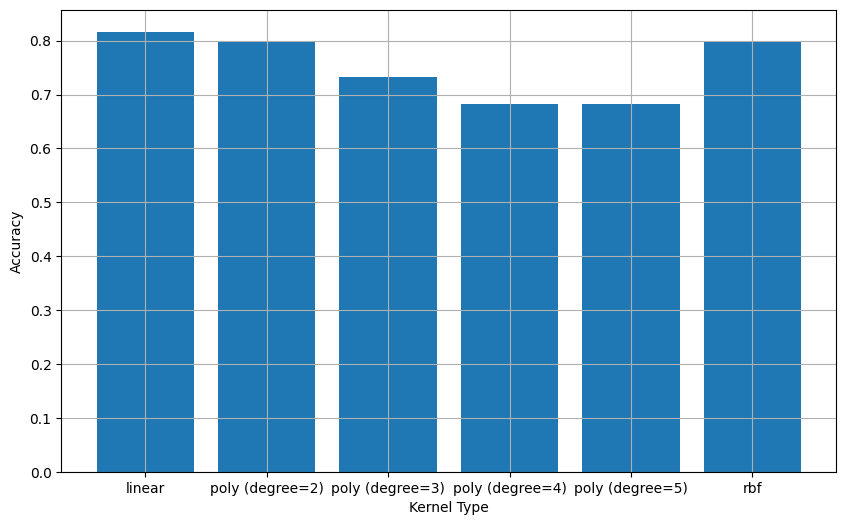

In [11]:
# Создание списка параметров ядра для SVM
kernels = ['linear', 'poly', 'rbf']
poly_degrees = [2, 3, 4, 5]  # Список степеней для полиномиального ядра

# Списки для хранения точности и меток
accuracies = []
x_labels = []

# Обучение моделей SVM с различными ядрами
for kernel in kernels:
    if kernel == 'poly':
        for degree in poly_degrees:
            # создание модели
            svm_model = SVC(kernel=kernel, degree=degree)
            # обучение
            svm_model.fit(X_train, y_train)
            # предсказание
            y_pred = svm_model.predict(X_test)
            # расчет точности
            accuracy = accuracy_score(y_test, y_pred)
            accuracies.append(accuracy)
            x_labels.append(f'{kernel} (degree={degree})')
    else:
        svm_model = SVC(kernel=kernel)
        svm_model.fit(X_train, y_train)
        y_pred = svm_model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
        x_labels.append(kernel)

# Построение диаграммы
x_positions = np.arange(len(x_labels)) # для выравнивания столбцов
plt.figure(figsize=(10, 6))
# выравнивание столбцов по центру относительно x_positions, высота accuracies
plt.bar(x_positions, accuracies, align='center')
plt.xticks(x_positions, x_labels)
plt.xlabel('Kernel Type')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [12]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
metrics(y_test, y_pred)

Precision: 0.8625
Recall: 0.8226
F1 Score: 0.8124
Confusion Matrix:
[[20 11]
 [ 0 29]]


In [13]:
params = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [2, 3, 4],
    'criterion': ['gini', 'entropy']
}

# Создание модели решающего дерева
tree_classifier = DecisionTreeClassifier()

# Создание объекта GridSearchCV для поиска лучших параметров
grid_search = GridSearchCV(tree_classifier, params, scoring='accuracy')

# Обучение модели на обучающих данных
grid_search.fit(X_train, y_train)

# Получение лучших параметров
best_params = grid_search.best_params_
print("Лучшие параметры:", best_params)

# Использование лучшей модели для предсказания на тестовых данных
best_classifier = grid_search.best_estimator_
y_pred = grid_search.predict(X_test)

# Оценка точности на тестовых данных
test_accuracy = accuracy_score(y_test, y_pred)
print("Точность:", test_accuracy)

Лучшие параметры: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 3}
Точность: 0.95


In [14]:
tree_classifier = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_leaf=2, min_samples_split=3)
tree_classifier.fit(X_train, y_train)
y_pred = tree_classifier.predict(X_test)
metrics(y_test, y_pred)

Precision: 0.9531
Recall: 0.9516
F1 Score: 0.9500
Confusion Matrix:
[[28  3]
 [ 0 29]]
